In [155]:
import numpy as np
import matplotlib.pyplot as plt
import winsound
from scipy import ndimage

SAMPLES = 30
STEP_SIZE = 20
STEP_Q = 97
STEP_LAST = 1919

FOLDERPATH = 'default'
DATAPATH = 'plot_'

SAVEPATH = 'average/'

ly = 50
lx = 50
spatial_delta = 0.004
dt = 300
D2 = 0.000005

n1_coarse = np.zeros((SAMPLES, STEP_Q, lx, ly))
n2_coarse = np.zeros((SAMPLES, STEP_Q, lx, ly))
n1_stochastic = np.zeros((SAMPLES, STEP_Q, lx, ly))
n2_stochastic = np.zeros((SAMPLES, STEP_Q, lx, ly))
n1_diffusion = np.zeros((SAMPLES, STEP_Q, lx, ly))
n2_diffusion = np.zeros((SAMPLES, STEP_Q, lx, ly))

for i in range(SAMPLES):
    for j in range(STEP_Q-1):
        n1_coarse[i,j,:,:] = np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(j*STEP_SIZE) +'/' +'n1_coarse'+'.csv', delimiter=";")
        n1_stochastic[i,j,:,:] = np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(j*STEP_SIZE) +'/' +'n1'+'.csv', delimiter=";")
        n2_coarse[i,j,:,:] = np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(j*STEP_SIZE) +'/' +'n2_coarse'+'.csv', delimiter=";")
        n2_stochastic[i,j,:,:] = np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(j*STEP_SIZE) +'/' +'n2'+'.csv', delimiter=";")
        n1_diffusion[i,j,:,:] = np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(j*STEP_SIZE) +'/' +'n1_diffusion'+'.csv', delimiter=";")
        n2_diffusion[i,j,:,:] = np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(j*STEP_SIZE) +'/' +'n2_diffusion'+'.csv', delimiter=";")
    n1_coarse[i,j+1,:,:] += np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(STEP_LAST) +'/' +'n1_coarse'+'.csv', delimiter=";")
    n1_stochastic[i,j+1,:,:] += np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(STEP_LAST) +'/' +'n1'+'.csv', delimiter=";")
    n2_coarse[i,j+1,:,:] += np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(STEP_LAST) +'/' +'n2_coarse'+'.csv', delimiter=";")
    n2_stochastic[i,j+1,:,:] += np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(STEP_LAST) +'/' +'n2'+'.csv', delimiter=";")
    n1_diffusion[i,j+1,:,:] += np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(STEP_LAST) +'/' +'n1_diffusion'+'.csv', delimiter=";")
    n2_diffusion[i,j+1,:,:] += np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(STEP_LAST) +'/' +'n2_diffusion'+'.csv', delimiter=";")
winsound.Beep(440, 1000)


In [161]:
n1 = np.zeros((STEP_Q,50,50))
n2 = np.zeros((STEP_Q,50,50))
n1v = np.zeros((STEP_Q,50,50))
n2v = np.zeros((STEP_Q,50,50))
n1_control = np.zeros((STEP_Q,50,50))
n2_control = np.zeros((STEP_Q,50,50))
n1v_control = np.zeros((STEP_Q,50,50))
n2v_control = np.zeros((STEP_Q,50,50))
n1d_control = np.zeros((SAMPLES, STEP_Q, 50, 50))
n2d_control = np.zeros((SAMPLES, STEP_Q, 50, 50))
O2 = np.zeros((STEP_Q,50,50))

for i in range(SAMPLES):
    n1d_control[i, 0, :, :] = n1_coarse[i, 0, :, :]
    n2d_control[i, 0, :, :] = n2_coarse[i, 0, :, :]
    for j in range(STEP_Q-1):
        n1d_control[i, j + 1, :, :] = n1d_control[i, j, :, :]*np.exp(-dt*n1_diffusion[i, j, :, :]) + n1_stochastic[i, j, :, :] - n1_coarse[i, j, :, :]
        n2d_control[i, j + 1, :, :] = n2_coarse[i, j, :, :]*np.exp(-dt*D2*ndimage.laplace(n2_coarse[i, j, :, :]*spatial_delta, mode='constant')*spatial_delta) + n2_stochastic[i,j,:,:]-n2_coarse[i,j,:,:]

for i in range(SAMPLES):
    for j in range(STEP_Q):
        n1[j,:,:] += n1_coarse[i, j, :, :]
        n2[j,:,:] += n2_coarse[i, j, :, :]
        n1_control[j,:,:] += n1d_control[i, j, :, :]
        n2_control[j,:,:] += n2d_control[i, j, :, :]
n1=n1/SAMPLES
n2=n2/SAMPLES
n1_control=n1_control/SAMPLES
n2_control=n2_control/SAMPLES

for i in range(SAMPLES):
    for j in range(STEP_Q):
        n1v[j,:,:] += np.square(n1_stochastic[i, j, :, :]-n1[j, :, :])
        n2v[j,:,:] += np.square(n2_stochastic[i, j, :, :]-n2[j, :, :])
        n1v_control[j,:,:] += np.square(n1d_control[i, j, :, :]-n1_control[j, :, :])
        n2v_control[j,:,:] += np.square(n2d_control[i, j, :, :]-n2_control[j, :, :])
n1v=n1v/SAMPLES
n2v=n2v/SAMPLES
n1v_control=n1v_control/SAMPLES
n2v_control=n2v_control/SAMPLES

winsound.Beep(440, 1000)

In [157]:
for i in range(SAMPLES):
    n2_control[0,:,:] = n2_coarse[i,0,:,:]
    for j in range(STEP_Q-1):
        n2_control[j+1,:,:] += n2_coarse[i,j,:,:]*np.exp(-dt*D2*ndimage.laplace(n2_coarse[i,j,:,:], mode='constant'))
    # n2_control[STEP_Q-1,:,:] += n2_control[STEP_Q-2,:,:]*np.exp(-dt*np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(STEP_LAST) +'/' +'n2_diffusion'+'.csv', delimiter=";"))
n2_control=n2_control/SAMPLES

n2d_control = np.zeros((SAMPLES, STEP_Q, 50, 50))
for i in range(SAMPLES):
    n2d_control[i, 0, :, :] = n2_coarse[i, 0, :, :]
    for j in range(STEP_Q-1):
        n2d_control[i,j+1,:,:] = n2_coarse[i, j, :, :]*np.exp(-dt*D2*ndimage.laplace(n2_coarse[i, j, :, :], mode='constant')*spatial_delta)
        
n2_control = np.zeros((STEP_Q,50,50))
for i in range(SAMPLES):
    for j in range(STEP_Q-1):
        n2_control[j,:,:] += n2d_control[i, j, :, :]
n2_control = n2_control/SAMPLES

n2v_control = np.zeros((STEP_Q,50,50))
for i in range(SAMPLES):
    for j in range(STEP_Q-1):
        n2v_control[j, :, :] += np.square(n2d_control[i, j, :, :] - n2_control[j, :, :])
n2v_control = n2v_control/SAMPLES
        
winsound.Beep(440, 1000)

In [123]:
for i in range(SAMPLES):
    n2_control[0,:,:] = n2_coarse[i,0,:,:]
    for j in range(STEP_Q-1):
        n2_control[j+1,:,:] += n2_coarse[i,j,:,:]*np.exp(-dt*D2*ndimage.laplace(n2_coarse[i,j,:,:], mode='constant'))
    # n2_control[STEP_Q-1,:,:] += n2_control[STEP_Q-2,:,:]*np.exp(-dt*np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(STEP_LAST) +'/' +'n2_diffusion'+'.csv', delimiter=";"))
n2_control=n2_control/SAMPLES

n2d_control = np.zeros((SAMPLES, STEP_Q, 50, 50))
for i in range(SAMPLES):
    n2d_control[i, 0, :, :] = n2_coarse[i, 0, :, :]
    for j in range(STEP_Q-1):
        n2d_control[i,j+1,:,:] = n2_coarse[i, j, :, :]*np.exp(-dt*D2*ndimage.laplace(n2_coarse[i, j, :, :], mode='constant'))

n2_control = np.zeros((STEP_Q,50,50))        
for i in range(SAMPLES):
    for j in range(STEP_Q-1):
        n2_control[j,:,:] += n2d_control[i, j, :, :]
n2_control = n2_control/SAMPLES

n2v_control = np.zeros((STEP_Q,50,50))
for i in range(SAMPLES):
    for j in range(STEP_Q-1):
        n2v_control[j, :, :] += np.square(n2d_control[i, j, :, :] - n2_control[j, :, :])
n2v_control = n2v_control/SAMPLES
        
winsound.Beep(440, 1000)

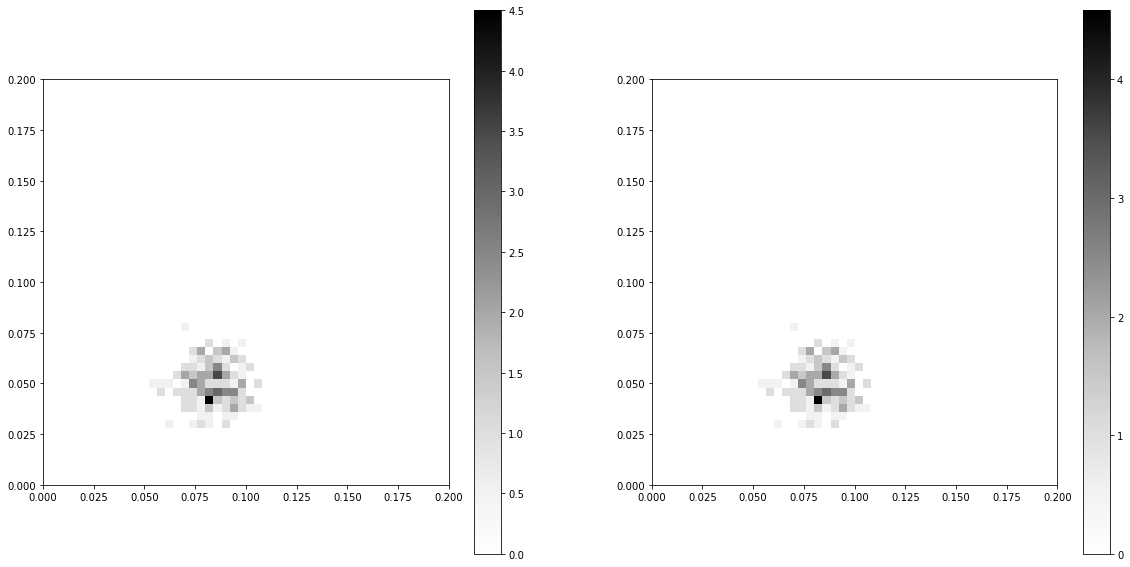

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import winsound
from scipy import ndimage
import sys
import cv2 as cv

def wrap(i,size):
    if i>=size:
        i=0
    if i<0:
        i=size-1
    return i

def del2(A):
    A = np.asarray(A)
    nx, ny = A.shape
    L = np.zeros((nx,ny))
    for i in range(nx):
        for j in range(ny):
            L[i,j] = (A[wrap(i+1,nx),j] + A[wrap(i-1,ny),j] + A[i,wrap(j+1,ny)] + A[i,wrap(j-1,ny)])/4 - A[i,j] 
    print(A)
    print(L)
    
    
SAMPLES = 10
STEP_SIZE = 20
STEP_Q = 97
STEP_LAST = 1919

FOLDERPATH = 'default'
DATAPATH = 'plot_'

SAVEPATH = 'average/'

ly = 50
lx = 50
spatial_delta = 0.004
dt = 300
D2 = 0.000005
dL = 1

j=0
i=0
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
test = np.genfromtxt (FOLDERPATH + str(i) + '/'+ DATAPATH + str(j*STEP_SIZE) +'/' +'n2_coarse'+'.csv', delimiter=";")
result = test*np.exp(-dt*D2*ndimage.filters.laplace(test,mode='constant'))
im1 = axs[0].imshow(np.transpose(test), cmap='Greys', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
fig.colorbar(im1, ax=axs[0])
im2 =axs[1].imshow(np.transpose(result),  cmap='Greys', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
fig.colorbar(im2, ax=axs[1])
plt.show()

In [ ]:

for step in range(STEP_Q):
    i = step * STEP_SIZE
    fig, axs = plt.subplots(1, 3, figsize=(30, 10))
    im1 = axs[0].imshow(np.transpose(n1[step,:,:]), cmap='Greys', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
    axs[0].title.set_text(r'$AVG(n_1(x, t=' + str(int(i * dt)) + ' min)$)')
    fig.colorbar(im1, ax=axs[0])

    im2 = axs[1].imshow(np.transpose(n2[step,:,:]), cmap='Greys', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
    axs[1].title.set_text(r'$AVG(n_2(x, t=' + str(int(i * dt)) + ' min))$')
    fig.colorbar(im2, ax=axs[1])

    im3 = axs[2].imshow(np.transpose(O2[step,:,:]), cmap='Reds', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
    axs[2].title.set_text(r'$AVG(O_2(x, t=' + str(int(i * dt)) + ' min))$')
    fig.colorbar(im3, ax=axs[2])
    plt.savefig(SAVEPATH + 'averages' + str(i) + '.png')

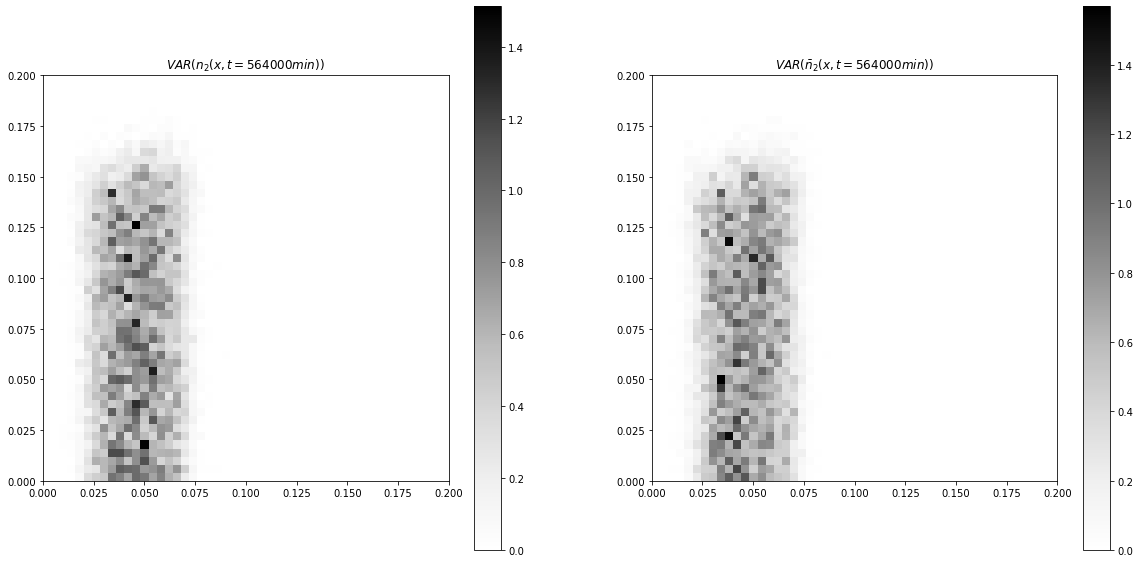

In [162]:
i = 95
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
im1 = axs[0].imshow(np.transpose(n2v[i-1,:,:]), cmap='Greys', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
axs[0].title.set_text(r'$VAR(n_2(x, t=' + str(int(i-1) * dt * STEP_SIZE) + ' min)$)')
fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(np.transpose(n2v_control[i-1,:,:]), cmap='Greys', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
axs[1].title.set_text(r'$VAR(\bar{n}_2(x, t=' + str(int(i-1) * dt * STEP_SIZE) + ' min)$)')
fig.colorbar(im2, ax=axs[1])
plt.savefig(SAVEPATH +'variances.png')
plt.show()

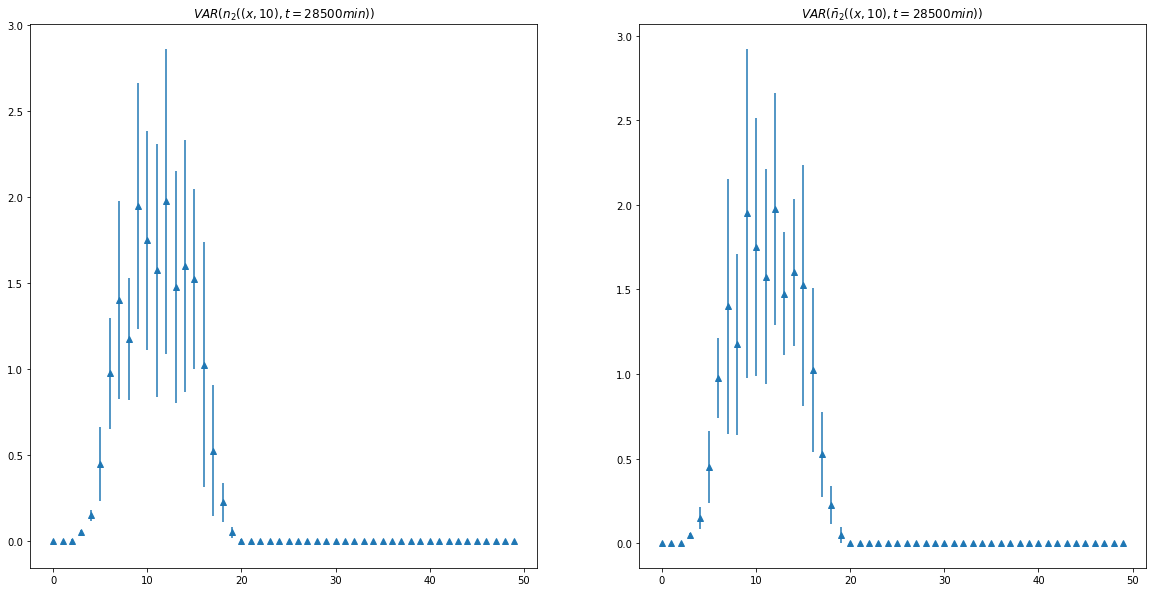

In [151]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].errorbar(np.arange(50), n2[STEP_Q-1,:,30], n2v[STEP_Q-1,:,40], linestyle='None', marker='^')
axs[0].title.set_text(r'$VAR(n_2((x,10), t=' + str(int(i * dt)) + ' min)$)')
axs[1].errorbar(np.arange(50), n2[STEP_Q-1,:,30], n2v_control[STEP_Q-1,:,40], linestyle='None', marker='^')
axs[1].title.set_text(r'$VAR(\bar{n}_2((x,10), t=' + str(int(i * dt)) + ' min)$)')
plt.savefig(SAVEPATH +'errors.png')
plt.show()

In [24]:
n2d_control = np.zeros((SAMPLES, STEP_Q, 50, 50))
for i in range(SAMPLES):
    n2d_control[i, 0, :, :] = n2_coarse[i, 0, :, :]
    for j in range(STEP_Q-1):
        n2d_control[i,j+1,:,:] = n2_coarse[i, j, :, :]*np.exp(-dt*D2*ndimage.laplace(n2_coarse[i, j, :, :], mode='constant')*spatial_delta**2)

n2_control = np.zeros((STEP_Q,50,50))        
for i in range(SAMPLES):
    for j in range(STEP_Q-1):
        n2_control[j,:,:] += n2d_control[i, j, :, :]
n2_control = n2_control/SAMPLES

n2v_control = np.zeros((STEP_Q,50,50))
for i in range(SAMPLES):
    for j in range(STEP_Q-1):
        n2v_control[j, :, :] += np.square(n2d_control[i, j, :, :] - n2_control[j, :, :])
n2v_control = n2v_control/SAMPLES
        
winsound.Beep(440, 1000)

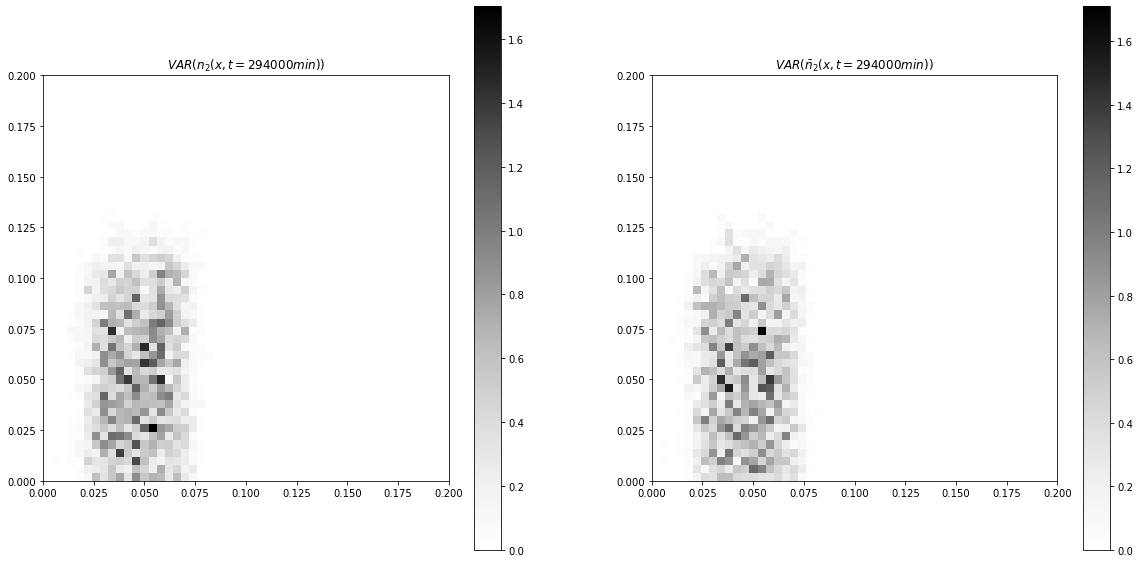

In [87]:
i = 50
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
im1 = axs[0].imshow(np.transpose(n2v[i-1,:,:]), cmap='Greys', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
axs[0].title.set_text(r'$VAR(n_2(x, t=' + str(int(i-1) * dt * STEP_SIZE) + ' min)$)')
fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(np.transpose(n2v_control[i-1,:,:]), cmap='Greys', interpolation='nearest', extent=[0, ly * spatial_delta, 0, lx * spatial_delta])
axs[1].title.set_text(r'$VAR(\bar{n}_2(x, t=' + str(int(i-1) * dt * STEP_SIZE) + ' min)$)')
fig.colorbar(im2, ax=axs[1])
plt.savefig(SAVEPATH +'variances.png')
plt.show()

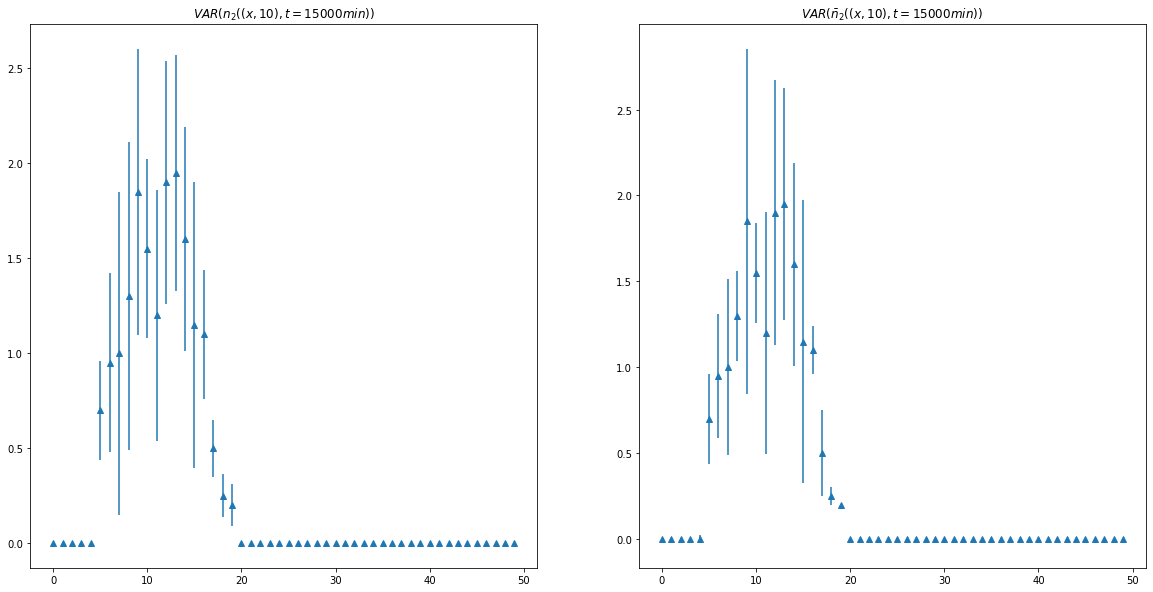

In [88]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs[0].errorbar(np.arange(50), n2[i-1,:,40], n2v[i-1,:,40], linestyle='None', marker='^')
axs[0].title.set_text(r'$VAR(n_2((x,10), t=' + str(int(i * dt)) + ' min)$)')
axs[1].errorbar(np.arange(50), n2[i-1,:,40], n2v_control[i-1,:,40], linestyle='None', marker='^')
axs[1].title.set_text(r'$VAR(\bar{n}_2((x,10), t=' + str(int(i * dt)) + ' min)$)')
plt.savefig(SAVEPATH +'errors.png')
plt.show()